# Data Modelling - Student Grade Prediction

#### Group Members
#### Wahaj Raza CS-21055
#### Farrukh Niaz CS-21064
#### Huzaifa Naseer Khan CS-21067

#### Import libraries

In [2]:
import sys
import scipy
import numpy
import pandas
import random

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import itertools
import datetime
import matplotlib.cm as cm
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
get_ipython().run_line_magic('matplotlib', 'inline')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from sklearn import model_selection, preprocessing, linear_model
from sklearn import neighbors
from sklearn import ensemble
from sklearn import svm
from sklearn import metrics

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Misc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score

pd.set_option('display.max_columns', None)

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000

## Plot Styling and Configurations
plt.style.context('seaborn-talk')
plt.style.use('fivethirtyeight')
params = {'legend.fontsize': '16',
          'figure.figsize': (15, 5),
         'axes.labelsize': '20',
         'axes.titlesize':'30',
         'xtick.labelsize':'15',
         'ytick.labelsize':'15'}
plt.rcParams.update(params)
plt.rcParams['text.color'] = '#A04000'
plt.rcParams['xtick.color'] = '#283747'
plt.rcParams['ytick.color'] = '#808000'
plt.rcParams['axes.labelcolor'] = '#283747'

In [3]:
df = pd.read_csv('Data.csv')
df.head()

,Gender,Nationality,Class Level,Age,School Type,Main Administration,Candidacy type,Degree
0,female,Saudi,3,21,Governmental,Riyadh,Self-Candidacy,593
1,male,Saudi,3,20,Governmental,Unknown,Self-Candidacy,600
2,female,Saudi,3,19,Governmental,Aseer,Self-Candidacy,640
3,male,Saudi,3,19,Governmental,Jazan,Self-Candidacy,600
4,female,Saudi,3,19,Governmental,Eastern,Talented-Candidacy,713


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38930 entries, 0 to 38929
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               38930 non-null  object
 1   Nationality          38930 non-null  object
 2   Class Level          38930 non-null  int64 
 3   Age                  38930 non-null  int64 
 4   School Type          38930 non-null  object
 5   Main Administration  38930 non-null  object
 6   Candidacy type       38930 non-null  object
 7   Degree               38930 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 2.4+ MB


In [5]:
### numerical 
numerical_cols = list(df.select_dtypes(exclude=['object']))
numerical_cols

### categorical
category_cols = list(df.select_dtypes(include=['object']))
category_cols

['Class Level', 'Age', 'Degree']

['Gender',
 'Nationality',
 'School Type',
 'Main Administration',
 'Candidacy type']

### List of Categorical Columns

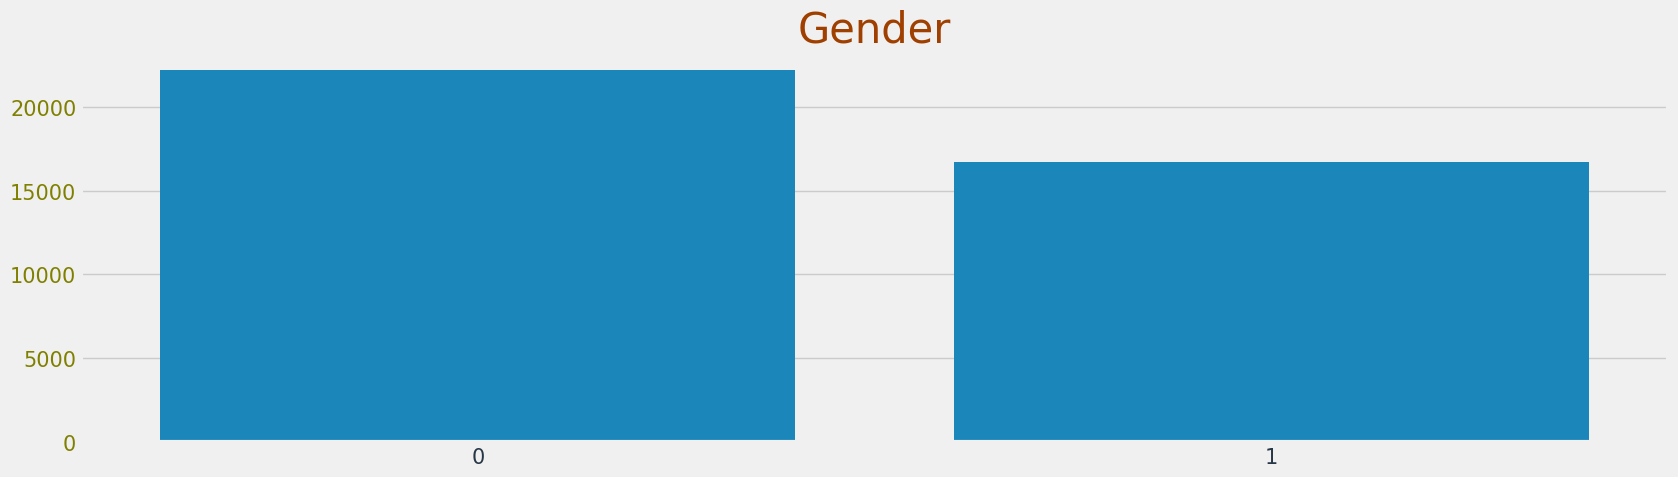

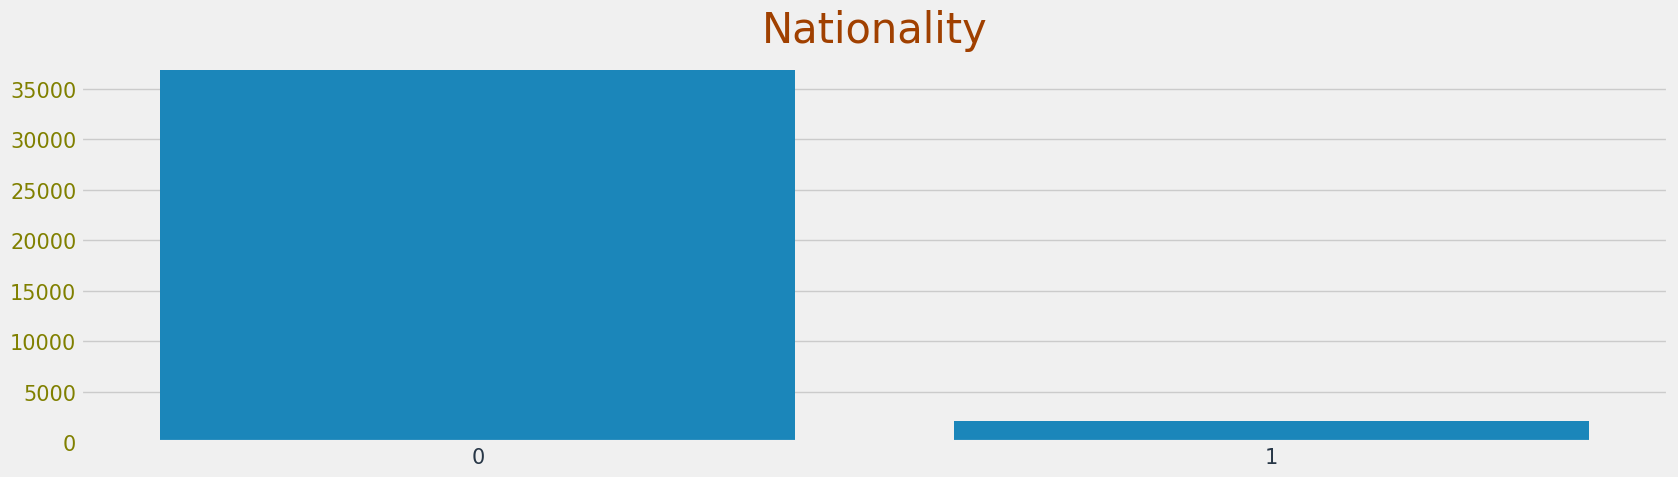

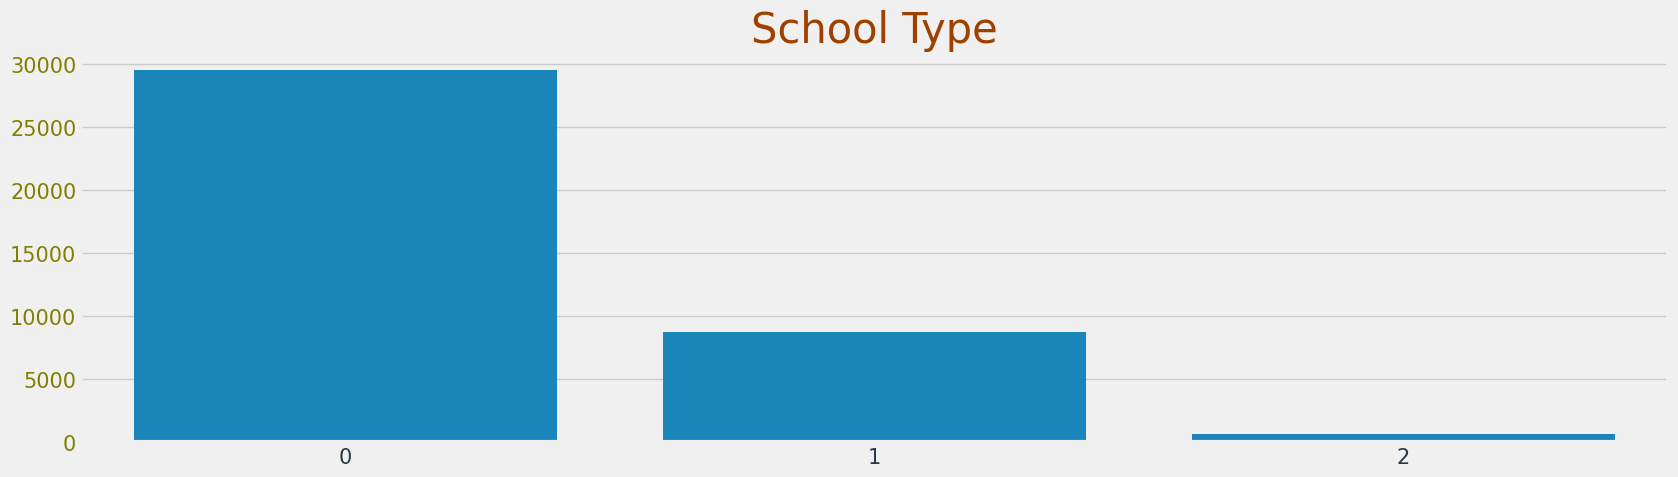

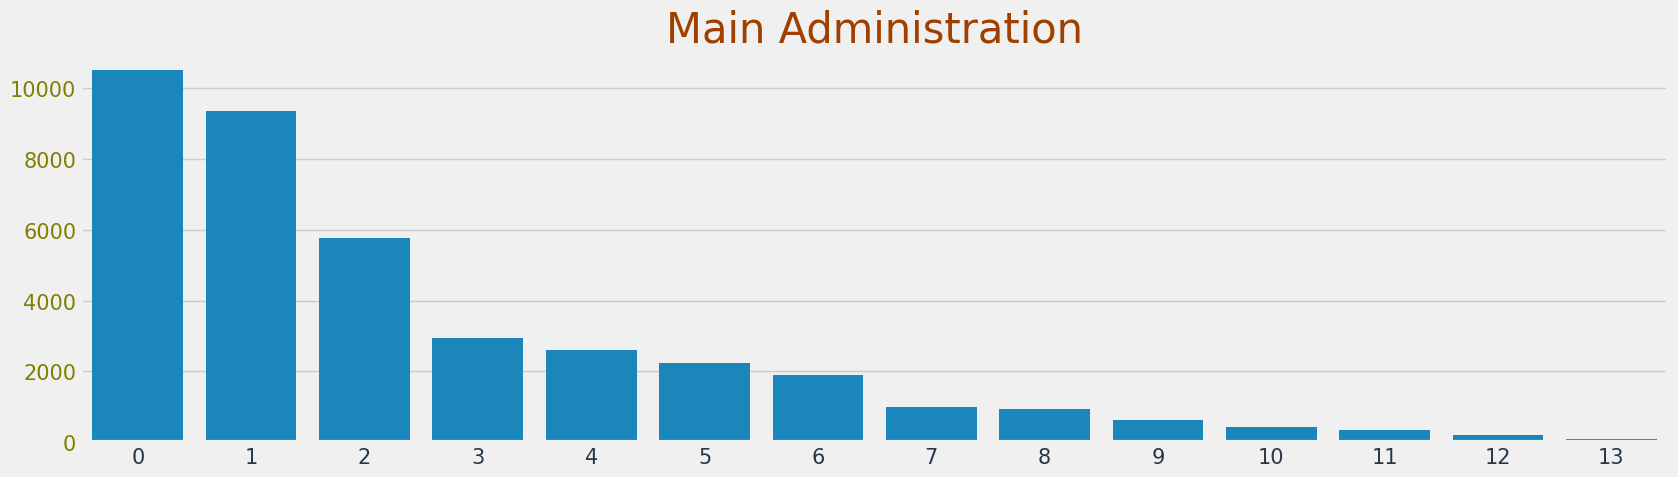

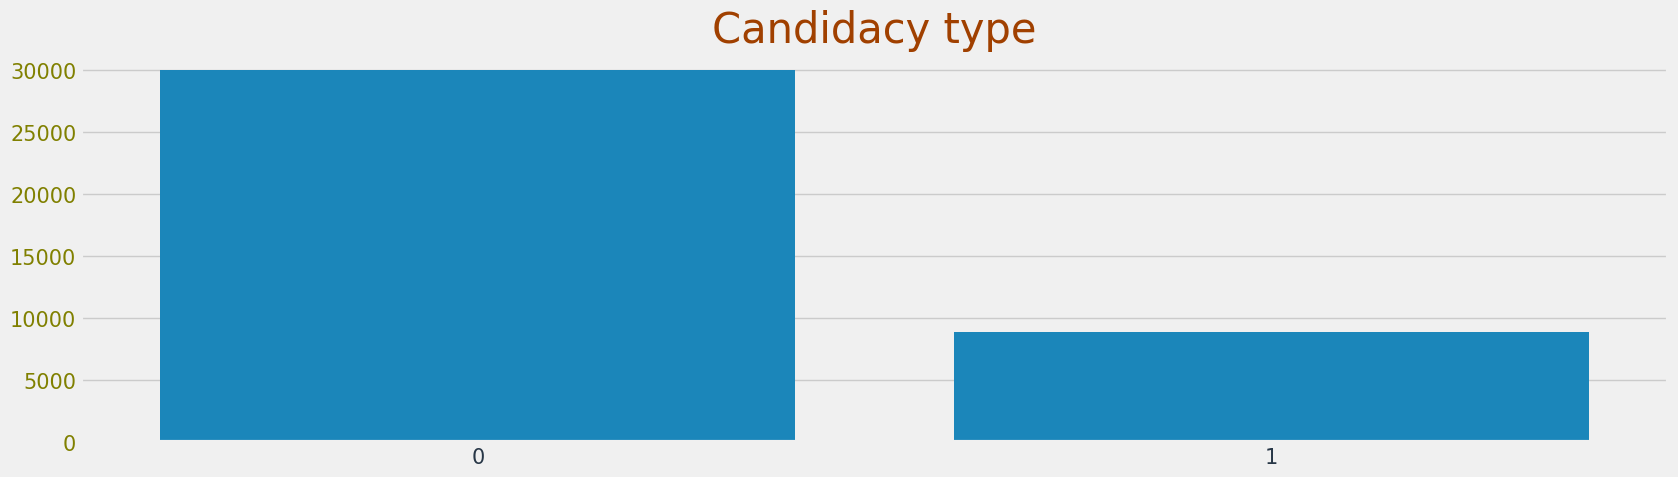

In [6]:
for col in category_cols:
    plt.figure(figsize=(17,5))
    sns.barplot(df[col].value_counts().values)
    plt.title(col)
    plt.tight_layout()
    plt.show();
    
plt.show();

### Function to generate model report and plot auc_roc curve

In [7]:
def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test,  y_pred_proba)
    auc = roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.legend(loc=4)
    plt.show()
    pass

def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    pass

In [8]:
df.head()

,Gender,Nationality,Class Level,Age,School Type,Main Administration,Candidacy type,Degree
0,female,Saudi,3,21,Governmental,Riyadh,Self-Candidacy,593
1,male,Saudi,3,20,Governmental,Unknown,Self-Candidacy,600
2,female,Saudi,3,19,Governmental,Aseer,Self-Candidacy,640
3,male,Saudi,3,19,Governmental,Jazan,Self-Candidacy,600
4,female,Saudi,3,19,Governmental,Eastern,Talented-Candidacy,713


# Data Engineering

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38930 entries, 0 to 38929
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               38930 non-null  object
 1   Nationality          38930 non-null  object
 2   Class Level          38930 non-null  int64 
 3   Age                  38930 non-null  int64 
 4   School Type          38930 non-null  object
 5   Main Administration  38930 non-null  object
 6   Candidacy type       38930 non-null  object
 7   Degree               38930 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 2.4+ MB


In [10]:
df.head()

,Gender,Nationality,Class Level,Age,School Type,Main Administration,Candidacy type,Degree
0,female,Saudi,3,21,Governmental,Riyadh,Self-Candidacy,593
1,male,Saudi,3,20,Governmental,Unknown,Self-Candidacy,600
2,female,Saudi,3,19,Governmental,Aseer,Self-Candidacy,640
3,male,Saudi,3,19,Governmental,Jazan,Self-Candidacy,600
4,female,Saudi,3,19,Governmental,Eastern,Talented-Candidacy,713


In [11]:
df['Degree'].describe()

count    38930.000000
mean       624.936476
std         76.615761
min        167.000000
25%        587.000000
50%        633.000000
75%        680.000000
max        833.000000
Name: Degree, dtype: float64

In [12]:
df['Pass/Fail'] = np.where(df['Degree'] >= 600, 1, 0)

In [13]:
df['Pass/Fail'].value_counts()

Pass/Fail
1    27656
0    11274
Name: count, dtype: int64

In [14]:
df = df.drop(['Degree'], axis = 1)

In [15]:
df.head()

,Gender,Nationality,Class Level,Age,School Type,Main Administration,Candidacy type,Pass/Fail
0,female,Saudi,3,21,Governmental,Riyadh,Self-Candidacy,0
1,male,Saudi,3,20,Governmental,Unknown,Self-Candidacy,1
2,female,Saudi,3,19,Governmental,Aseer,Self-Candidacy,1
3,male,Saudi,3,19,Governmental,Jazan,Self-Candidacy,1
4,female,Saudi,3,19,Governmental,Eastern,Talented-Candidacy,1


In [16]:
df['Class Level'] = df['Class Level'].astype('object')

In [17]:
df['School Type'].value_counts()

School Type
Governmental    29537
Private          8731
Foreign           662
Name: count, dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()
df['School Type'] = lbe.fit_transform(df['School Type'])

In [19]:
df['Main Administration'].value_counts()
df['Main Administration'] = lbe.fit_transform(df['Main Administration'])

Main Administration
Mecca                10526
Eastern               9364
Riyadh                5771
Aseer                 2931
Jazan                 2596
Madinah               2236
Qaseem                1910
Tabuk                  985
Bahah                  923
Jawf                   632
Hudud-Shimaliyyah      426
Hail                   339
Najran                 191
Unknown                100
Name: count, dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38930 entries, 0 to 38929
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               38930 non-null  object
 1   Nationality          38930 non-null  object
 2   Class Level          38930 non-null  object
 3   Age                  38930 non-null  int64 
 4   School Type          38930 non-null  int64 
 5   Main Administration  38930 non-null  int64 
 6   Candidacy type       38930 non-null  object
 7   Pass/Fail            38930 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 2.4+ MB


In [21]:
df = df.sample(frac = 1.0)

In [22]:
X = df.drop(['Pass/Fail'], axis = 1)
y = df['Pass/Fail']

In [23]:
X = pd.get_dummies(X)
X.head()

,Age,School Type,Main Administration,Gender_female,Gender_male,Nationality_Non-Saudi,Nationality_Saudi,Class Level_1,Class Level_2,Class Level_3,Candidacy type_Self-Candidacy,Candidacy type_Talented-Candidacy
20433,14,1,2,True,False,False,True,False,True,False,False,True
6061,17,1,8,True,False,False,True,False,False,True,True,False
2777,17,1,10,False,True,False,True,False,False,True,False,True
26363,11,1,8,True,False,False,True,True,False,False,True,False
5703,17,1,8,True,False,False,True,False,False,True,False,True


In [24]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
ss = MinMaxScaler(feature_range=(0,1))
X['Age'] = ss.fit_transform(np.array(X['Age']).reshape(-1, 1))

In [25]:
finalDF = pd.concat([X,y],axis = 1)
finalDF.to_csv('finalDf_v2.csv', index = False)

In [26]:
X

,Age,School Type,Main Administration,Gender_female,Gender_male,Nationality_Non-Saudi,Nationality_Saudi,Class Level_1,Class Level_2,Class Level_3,Candidacy type_Self-Candidacy,Candidacy type_Talented-Candidacy
20433,0.363636,1,2,True,False,False,True,False,True,False,False,True
6061,0.636364,1,8,True,False,False,True,False,False,True,True,False
2777,0.636364,1,10,False,True,False,True,False,False,True,False,True
26363,0.090909,1,8,True,False,False,True,True,False,False,True,False
5703,0.636364,1,8,True,False,False,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
21593,0.363636,1,8,False,True,False,True,False,True,False,True,False
13274,0.363636,1,7,True,False,False,True,False,True,False,False,True
22305,0.363636,1,10,True,False,False,True,False,True,False,True,False
17833,0.363636,2,12,True,False,False,True,False,True,False,True,False


## Define helper functions

In [27]:
### calculate number of TP from cross validation

import itertools
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import KFold

class_names = ['Fail', 'Pass']

def evaluate_model(data_x, data_y):
    k_fold = KFold(5, shuffle=True, random_state=123)

    predicted_targets = np.array([])
    actual_targets = np.array([])

    for train_ix, test_ix in k_fold.split(data_x):
        train_x, train_y, test_x, test_y = data_x[train_ix], data_y[train_ix], data_x[test_ix], data_y[test_ix]

        clf = RandomForestClassifier(criterion='entropy',max_depth=20,max_features='auto',n_estimators=100)
        # Fit the classifier
        classifier = clf.fit(train_x, train_y)

        # Predict the labels of the test set samples
        predicted_labels = classifier.predict(test_x)

        predicted_targets = np.append(predicted_targets, predicted_labels)
        actual_targets = np.append(actual_targets, test_y)

    return predicted_targets, actual_targets


def plot_confusion_matrix(predicted_labels_list, y_test_list):
    cnf_matrix = confusion_matrix(y_test_list, predicted_labels_list)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure(figsize = (17,10))
    generate_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix, without normalization')
    plt.show()

    # Plot normalized confusion matrix
    plt.figure(figsize = (17,10))
    generate_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, title='Normalized confusion matrix')
    plt.show()
    
def generate_confusion_matrix(cnf_matrix, classes, normalize=False, title='Confusion matrix'):
    if normalize:
        cnf_matrix = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cnf_matrix.max() / 2.
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, format(cnf_matrix[i, j], fmt), horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return cnf_matrix

### Split into train and Test

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [29]:
from imblearn.over_sampling import SMOTE, ADASYN, KMeansSMOTE
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import TomekLinks
smt = SMOTETomek(random_state=42)
X_train, y_train = smt.fit_resample(X_train, y_train)

smt = SMOTEENN(random_state=42)
X_train, y_train = smt.fit_resample(X_train, y_train)

## Modelling

In [30]:
from collections import Counter
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

sns.set(style='white', context='notebook', palette='deep')

from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
sns.set(style='white', context='notebook', palette='deep')
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier

LogisticRegression


LogisticRegression(class_weight={0: 1.5, 1: 1})


 clasification report:
               precision    recall  f1-score   support

           0       0.64      0.70      0.67      3280
           1       0.88      0.85      0.86      8399

    accuracy                           0.81     11679
   macro avg       0.76      0.78      0.77     11679
weighted avg       0.81      0.81      0.81     11679


 confussion matrix:
 [[2310  970]
 [1283 7116]]




<Axes: >

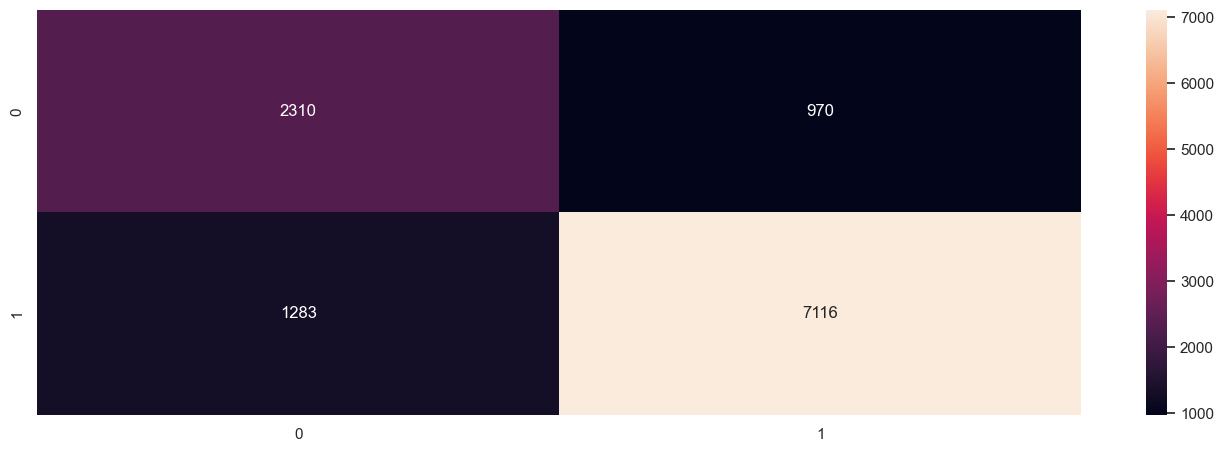

Naive Bayes


GaussianNB()


 clasification report:
               precision    recall  f1-score   support

           0       0.64      0.70      0.67      3280
           1       0.88      0.85      0.86      8399

    accuracy                           0.81     11679
   macro avg       0.76      0.78      0.77     11679
weighted avg       0.81      0.81      0.81     11679


 confussion matrix:
 [[2310  970]
 [1283 7116]]




<Axes: >

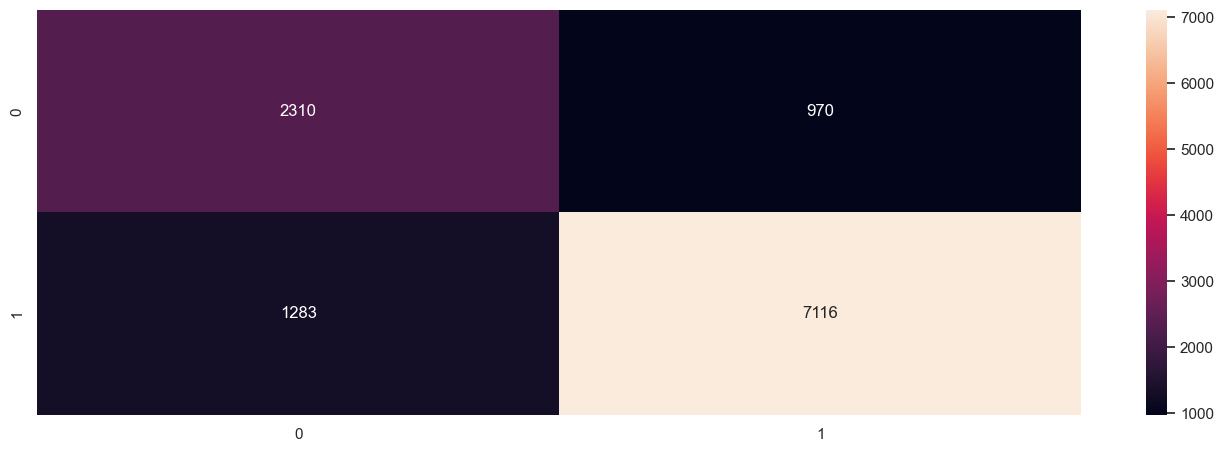

Decision Tree


DecisionTreeClassifier(class_weight={0: 1.5, 1: 1}, random_state=2)


 clasification report:
               precision    recall  f1-score   support

           0       0.64      0.68      0.66      3280
           1       0.87      0.85      0.86      8399

    accuracy                           0.80     11679
   macro avg       0.76      0.77      0.76     11679
weighted avg       0.81      0.80      0.81     11679


 confussion matrix:
 [[2243 1037]
 [1253 7146]]




<Axes: >

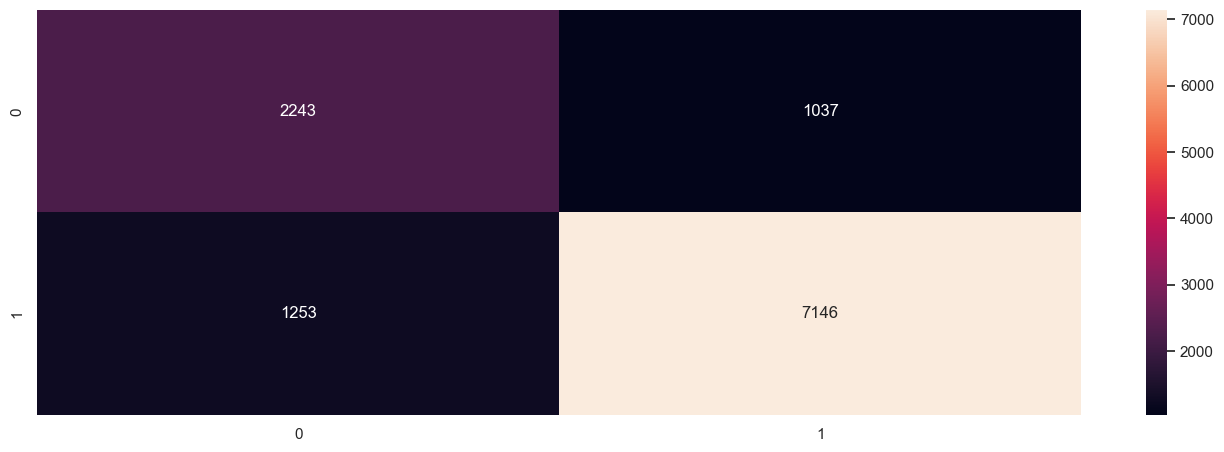

Random Forest


RandomForestClassifier(class_weight={0: 1.5, 1: 1}, random_state=2)


 clasification report:
               precision    recall  f1-score   support

           0       0.61      0.70      0.65      3280
           1       0.88      0.83      0.85      8399

    accuracy                           0.79     11679
   macro avg       0.74      0.76      0.75     11679
weighted avg       0.80      0.79      0.79     11679


 confussion matrix:
 [[2290  990]
 [1468 6931]]




<Axes: >

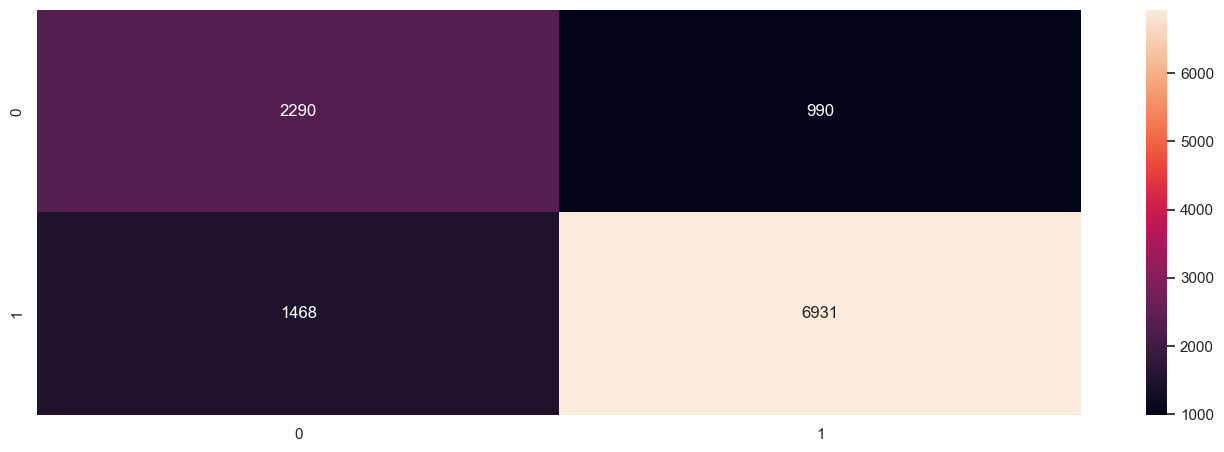

AdaBoost


AdaBoostClassifier(estimator=DecisionTreeClassifier(class_weight={0: 1.5, 1: 1},
                                                    random_state=2))


 clasification report:
               precision    recall  f1-score   support

           0       0.64      0.68      0.66      3280
           1       0.87      0.85      0.86      8399

    accuracy                           0.80     11679
   macro avg       0.76      0.77      0.76     11679
weighted avg       0.81      0.80      0.81     11679


 confussion matrix:
 [[2243 1037]
 [1253 7146]]




<Axes: >

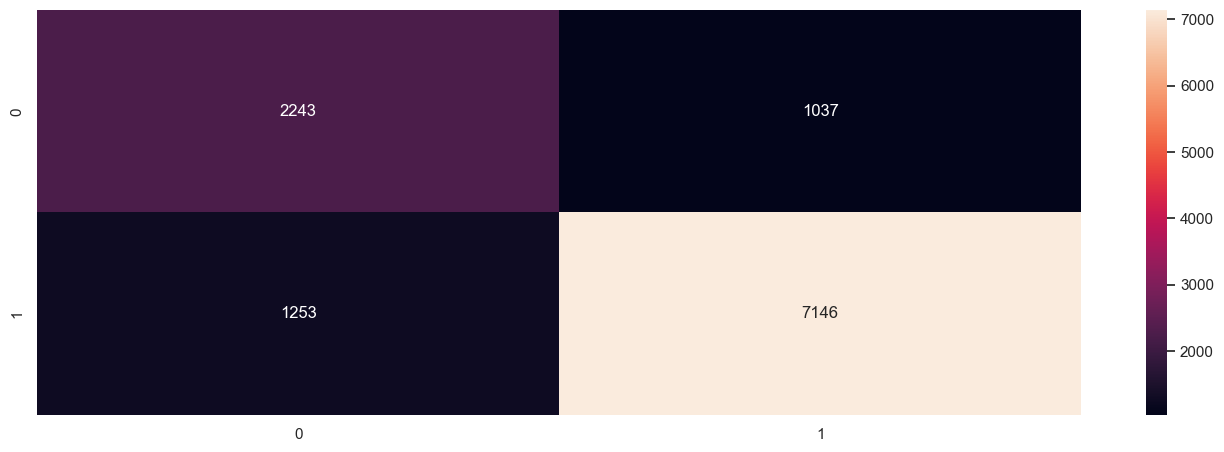

Extra Trees


ExtraTreesClassifier(class_weight={0: 1.5, 1: 1}, random_state=2)


 clasification report:
               precision    recall  f1-score   support

           0       0.62      0.70      0.65      3280
           1       0.87      0.83      0.85      8399

    accuracy                           0.79     11679
   macro avg       0.75      0.76      0.75     11679
weighted avg       0.80      0.79      0.80     11679


 confussion matrix:
 [[2281  999]
 [1410 6989]]




<Axes: >

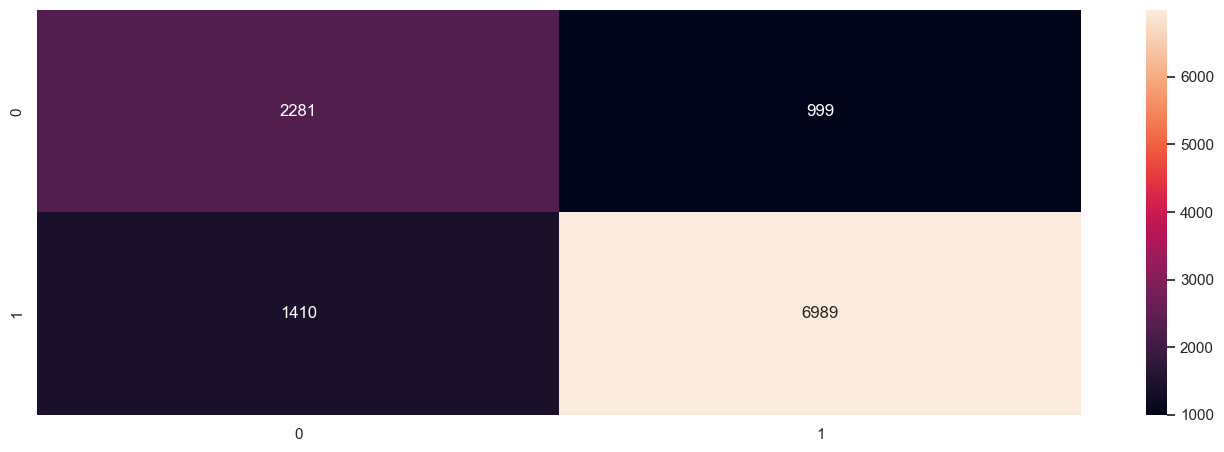

Stochastic Gradient Classifier


SGDClassifier(class_weight={0: 1.5, 1: 1}, random_state=2)


 clasification report:
               precision    recall  f1-score   support

           0       0.64      0.70      0.67      3280
           1       0.88      0.85      0.86      8399

    accuracy                           0.81     11679
   macro avg       0.76      0.78      0.77     11679
weighted avg       0.81      0.81      0.81     11679


 confussion matrix:
 [[2310  970]
 [1283 7116]]




<Axes: >

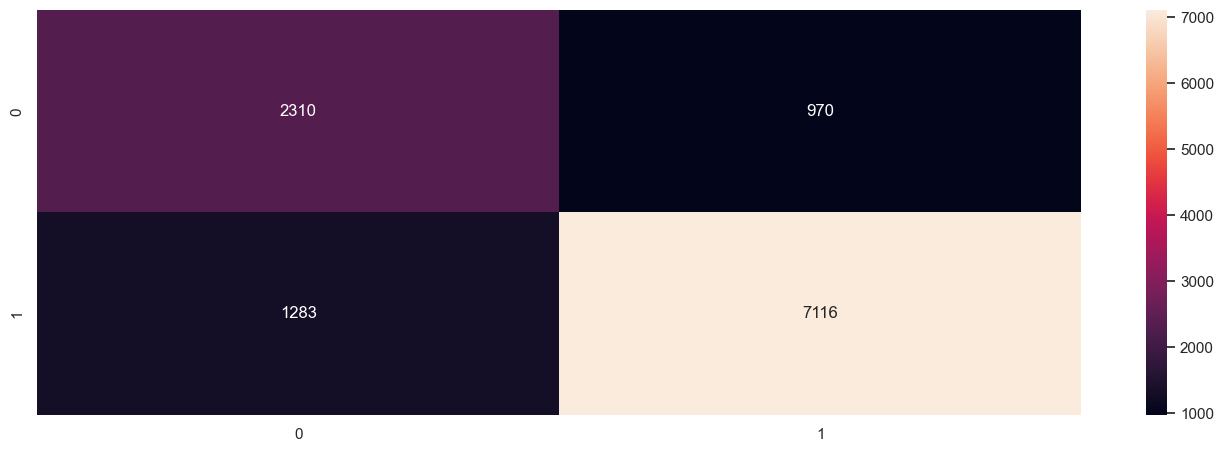

Multi-Layer Classifier


MLPClassifier(random_state=2)


 clasification report:
               precision    recall  f1-score   support

           0       0.64      0.69      0.67      3280
           1       0.88      0.85      0.86      8399

    accuracy                           0.81     11679
   macro avg       0.76      0.77      0.76     11679
weighted avg       0.81      0.81      0.81     11679


 confussion matrix:
 [[2267 1013]
 [1264 7135]]




<Axes: >

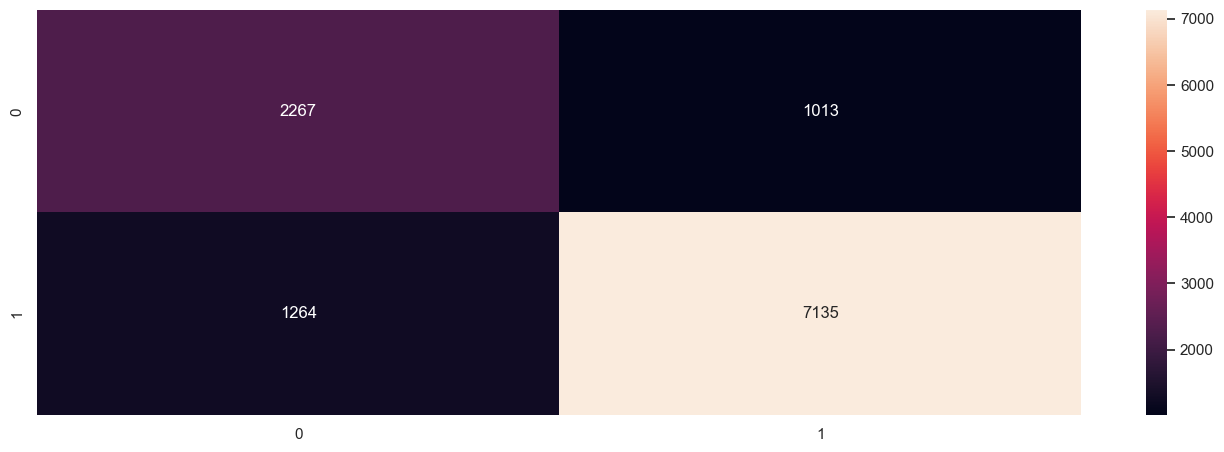

In [31]:
train_accuracy = []
test_accuracy = []
precision = []
recall = []
f1 = []
specificity = [] 
loss_log = [] 
roc= []
cohen_kappa = []
mcc = []

random_state = 2

models = ["LogisticRegression", 
          "Naive Bayes", 
          "Decision Tree", 
          "Random Forest", 
          "AdaBoost",  
          "Extra Trees", 
          "Stochastic Gradient Classifier", 
          "Multi-Layer Classifier"]

classifiers = []
classifiers.append(LogisticRegression(class_weight={0:1.5,1:1}))
classifiers.append(GaussianNB())
classifiers.append(DecisionTreeClassifier(random_state=random_state, class_weight={0:1.5,1:1}))
classifiers.append(RandomForestClassifier(random_state=random_state, class_weight={0:1.5,1:1}))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state, class_weight={0:1.5,1:1})))
classifiers.append(ExtraTreesClassifier(random_state=random_state, class_weight={0:1.5,1:1}))
classifiers.append(SGDClassifier(random_state=random_state, class_weight={0:1.5,1:1}))
classifiers.append(MLPClassifier(random_state=random_state))
                   
for classifier, model in zip(classifiers, models):
    print('='*len(model))
    print(model)
    print('='*len(model))
    classifier.fit(X_train, y_train)
    trainprediction = classifier.predict(X_train)
    prediction = classifier.predict(X_test)
    trainaccuracy = accuracy_score(y_train, trainprediction)
    testaccuracy = accuracy_score(y_test, prediction)
    train_accuracy.append(trainaccuracy)
    test_accuracy.append(testaccuracy)
    precision.append(precision_score(y_test, prediction,))
    recall.append(recall_score(y_test, prediction))
    f1.append(f1_score(y_test, prediction))
    print('\n clasification report:\n', classification_report(y_test,prediction))
    print('\n confussion matrix:\n',confusion_matrix(y_test, prediction))
    print('\n')
    CM = confusion_matrix(y_test, prediction)
    sns.heatmap(CM, annot=True, fmt='d')
    plt.show()

    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    Specificity = TN/(TN+FP)
    specificity.append(Specificity)

    Loss_log = metrics.log_loss(y_test, prediction)
    loss_log.append(Loss_log)

    ROC=metrics.roc_auc_score(y_test, prediction)
    roc.append(ROC)

    Cohen_Kappa = metrics.cohen_kappa_score(y_test, prediction)
    cohen_kappa.append(Cohen_Kappa)

    MCC = metrics.matthews_corrcoef(y_test, prediction)
    mcc.append(MCC)

In [32]:
scoreDF = pd.DataFrame({'Model' : models})
scoreDF['Train Accuracy'] = train_accuracy
scoreDF['Test Accuracy'] = test_accuracy
scoreDF['Precision'] =  precision
scoreDF['Recall'] =  recall
scoreDF['F1 Score'] = f1
scoreDF['Specificity'] = specificity
scoreDF['Matthew Correlation Coefficient'] = mcc
scoreDF['Cohen Kappa'] = cohen_kappa
scoreDF['ROC Score'] = roc
scoreDF['Loss Log'] = loss_log

scoreDF.set_index("Model")

,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,Specificity,Matthew Correlation Coefficient,Cohen Kappa,ROC Score,Loss Log
Model,,,,,,,,,,
LogisticRegression,0.989654,0.807090,0.880040,0.847244,0.863330,0.704268,0.537044,0.535927,0.775756,6.953194
Naive Bayes,0.988660,0.807090,0.880040,0.847244,0.863330,0.704268,0.537044,0.535927,0.775756,6.953194
Decision Tree,1.000000,0.803922,0.873274,0.850816,0.861898,0.683841,0.524667,0.524139,0.767329,7.067383
Random Forest,1.000000,0.789537,0.875016,0.825217,0.849387,0.698171,0.503508,0.501133,0.761694,7.585864
AdaBoost,1.000000,0.803922,0.873274,0.850816,0.861898,0.683841,0.524667,0.524139,0.767329,7.067383
Extra Trees,1.000000,0.793732,0.874937,0.832123,0.852993,0.695427,0.509945,0.508146,0.763775,7.434640
Stochastic Gradient Classifier,0.990122,0.807090,0.880040,0.847244,0.863330,0.704268,0.537044,0.535927,0.775756,6.953194
Multi-Layer Classifier,0.992635,0.805035,0.875675,0.849506,0.862392,0.691159,0.529059,0.528343,0.770332,7.027263


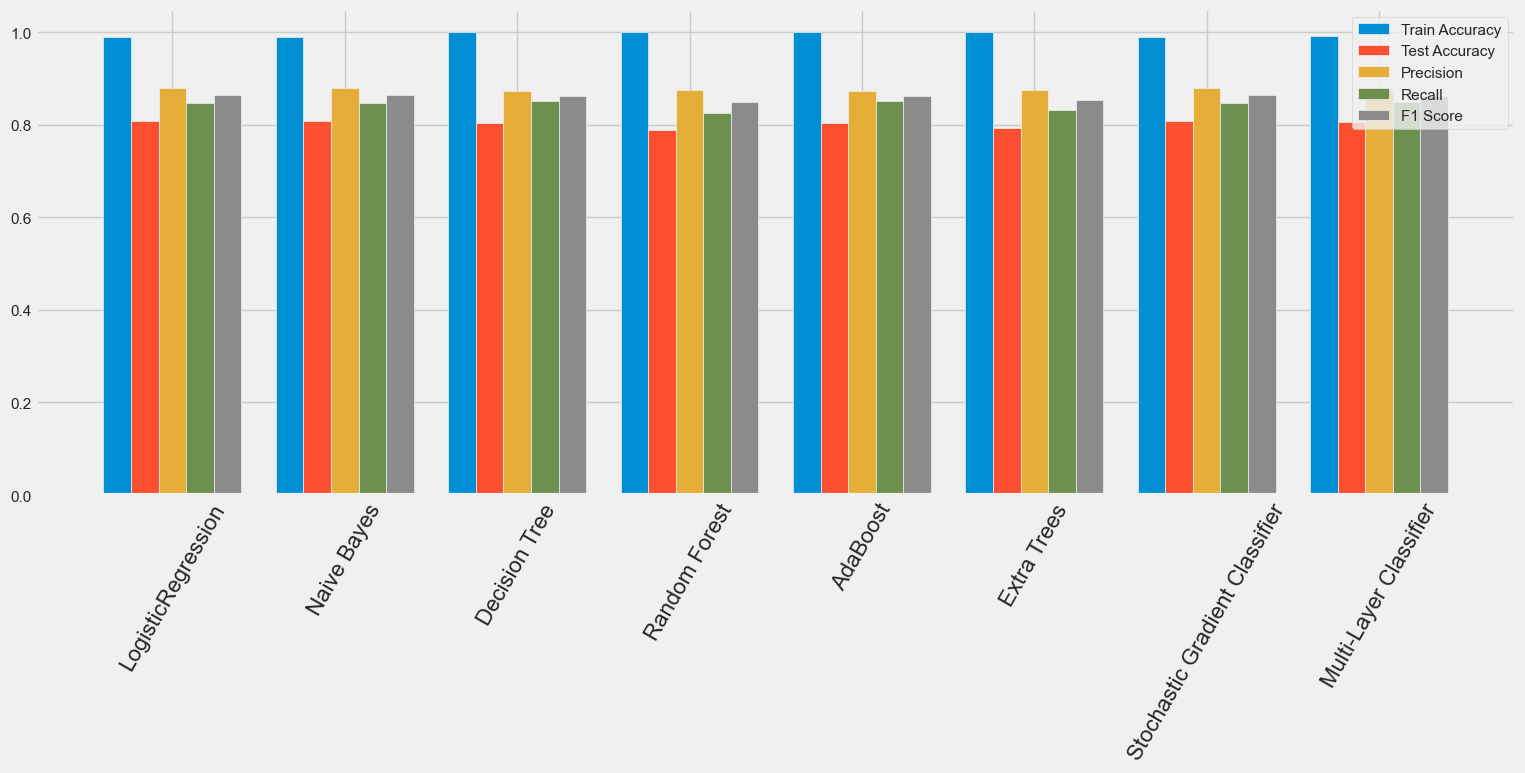

In [33]:
plt.style.use('fivethirtyeight')
def subcategorybar(X, vals, width=0.8):
    cols = ['Train Accuracy', 'Test Accuracy', 'Precision', 'Recall','F1 Score']
    n = len(vals)
    _X = np.arange(len(X))
    for i in range(n):
        plt.bar(_X - width/2. + i/float(n)*width, vals[i], width=width/float(n), align="edge")   
        
        
    plt.xticks(_X, X)
    
plt.figure(figsize = (17,6))
subcategorybar(models, [scoreDF['Train Accuracy'], scoreDF['Test Accuracy'], scoreDF['Precision'], scoreDF['Recall'], scoreDF['F1 Score']])
cols = ['Train Accuracy', 'Test Accuracy', 'Precision', 'Recall','F1 Score']
plt.xticks(rotation = 60, fontsize = 16)
plt.legend(cols)
plt.show();

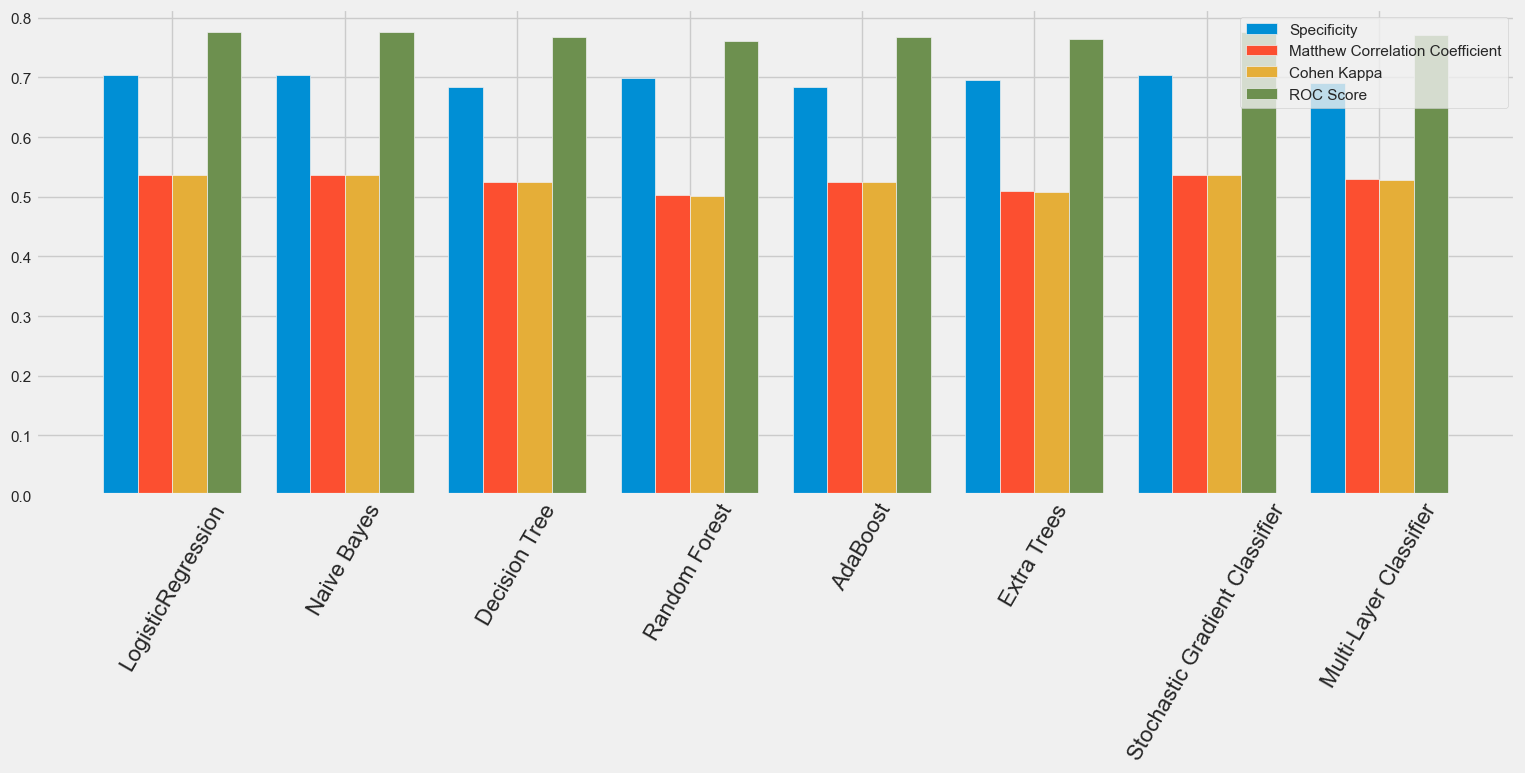

In [34]:
plt.figure(figsize = (17,6))
subcategorybar(models, [scoreDF['Specificity'], scoreDF['Matthew Correlation Coefficient'], scoreDF['Cohen Kappa'], scoreDF['ROC Score']])
cols = ['Specificity', 'Matthew Correlation Coefficient', 'Cohen Kappa', 'ROC Score']
plt.xticks(rotation = 60, fontsize = 16)
plt.legend(cols)
plt.show();

# Ensemble on Simple base Models

A voting ensemble (or a “majority voting ensemble“) is an ensemble machine learning model that combines the predictions from multiple other models.

It is a technique that may be used to improve model performance, ideally achieving better performance than any single model used in the ensemble.

A voting ensemble works by combining the predictions from multiple models. It can be used for classification or regression. In the case of regression, this involves calculating the average of the predictions from the models. In the case of classification, the predictions for each label are summed and the label with the majority vote is predicted.

**Hard Voting** - Predict the class with the largest sum of votes from models


**Soft Voting** - Predict the class with the largest summed probability from models.

### Simple Averaging

In [35]:
Y_train = y_train
Y_test = y_test

random_state = 123
LR = LogisticRegression(random_state = random_state, n_jobs=-1)
NB = GaussianNB()
SVM = SVC(random_state=random_state)
KNN = KNeighborsClassifier(n_jobs=-1)
DT = DecisionTreeClassifier(random_state=random_state)
                                              
LR.fit(X_train, Y_train)
NB.fit(X_train, Y_train)
SVM.fit(X_train, Y_train)
KNN.fit(X_train, Y_train)
DT.fit(X_train, Y_train)

LR_pred = LR.predict(X_test)
NB_pred = NB.predict(X_test)
SVM_pred = SVM.predict(X_test)
KNN_pred = KNN.predict(X_test)
DT_pred = DT.predict(X_test)

LogisticRegression(n_jobs=-1, random_state=123)

GaussianNB()

SVC(random_state=123)

KNeighborsClassifier(n_jobs=-1)

DecisionTreeClassifier(random_state=123)

In [36]:
averaged_preds = (LR_pred + NB_pred + SVM_pred + KNN_pred + DT_pred)//5
acc = accuracy_score(Y_test, averaged_preds)
print('\n Accuracy Score:\n', np.round(acc, 3))
                            
print('\n clasification report:\n', classification_report(Y_test,averaged_preds))
print('\n confussion matrix:\n', metrics.confusion_matrix(Y_test, averaged_preds))
print('\n Cohen Kappa Score:\n', metrics.cohen_kappa_score(Y_test, averaged_preds))

print('\n')


 Accuracy Score:
 0.781

 clasification report:
               precision    recall  f1-score   support

           0       0.59      0.72      0.65      3280
           1       0.88      0.81      0.84      8399

    accuracy                           0.78     11679
   macro avg       0.74      0.76      0.74     11679
weighted avg       0.80      0.78      0.79     11679


 confussion matrix:
 [[2352  928]
 [1627 6772]]

 Cohen Kappa Score:
 0.4914438996734265




- In hard voting (also known as majority voting), every individual classifier votes for a class, and the majority wins. In statistical terms, the predicted target label of the ensemble is the mode of the distribution of individually predicted labels.

- In soft voting, every individual classifier provides a probability value that a specific data point belongs to a particular target class. The predictions are weighted by the classifier's importance and summed up. Then the target label with the greatest sum of weighted probabilities wins the vote.

### Weighted Averaging


 Accuracy Score:
 0.807


<Axes: >


 clasification report:
               precision    recall  f1-score   support

           0       0.64      0.70      0.67      3280
           1       0.88      0.85      0.86      8399

    accuracy                           0.81     11679
   macro avg       0.76      0.78      0.77     11679
weighted avg       0.81      0.81      0.81     11679


 Cohen Kappa Score:
 0.5359271207264337


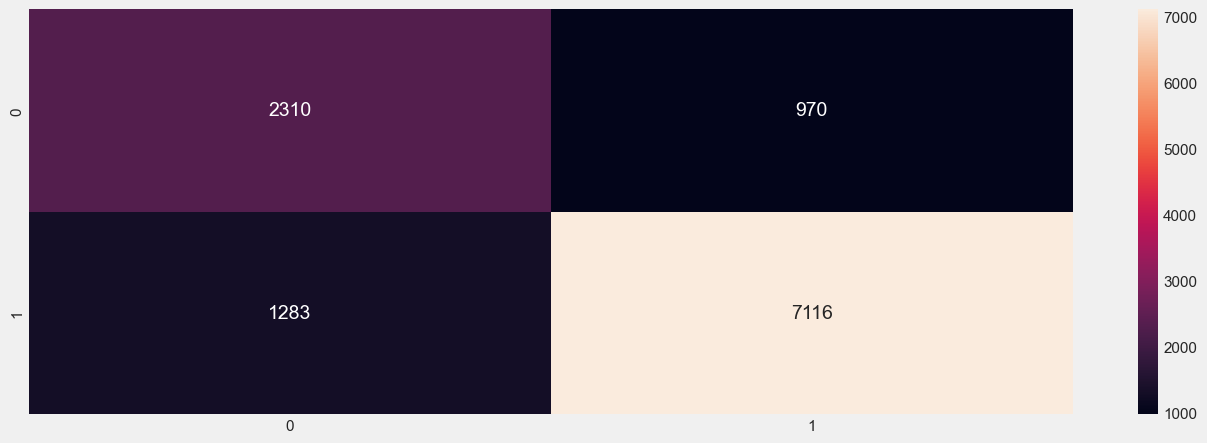

In [37]:
ensemble = VotingClassifier(estimators=[('Logistic Regression', LogisticRegression(random_state = random_state)),
                                              ('Naive Bayes', GaussianNB()),
                                              ('SVM', SVC(random_state=random_state)),
                                              ('KNN', KNeighborsClassifier()),
                                              ('Decision Tree', DecisionTreeClassifier(random_state=random_state))], 
                                               voting='hard').fit(X_train,Y_train)

y_pred_ensemble = ensemble.predict(X_test)

print('\n Accuracy Score:\n', np.round(accuracy_score(Y_test, y_pred_ensemble), 3))
sns.heatmap(confusion_matrix(Y_test,y_pred_ensemble),annot=True,fmt='2.0f')
print('\n clasification report:\n', classification_report(Y_test,y_pred_ensemble))
print('\n Cohen Kappa Score:\n', metrics.cohen_kappa_score(Y_test, y_pred_ensemble))

plt.show()

### Max Voting


 Accuracy Score:
 0.807


<Axes: >


 clasification report:
               precision    recall  f1-score   support

           0       0.64      0.70      0.67      3280
           1       0.88      0.85      0.86      8399

    accuracy                           0.81     11679
   macro avg       0.76      0.78      0.77     11679
weighted avg       0.81      0.81      0.81     11679


 Cohen Kappa Score:
 0.5359271207264337


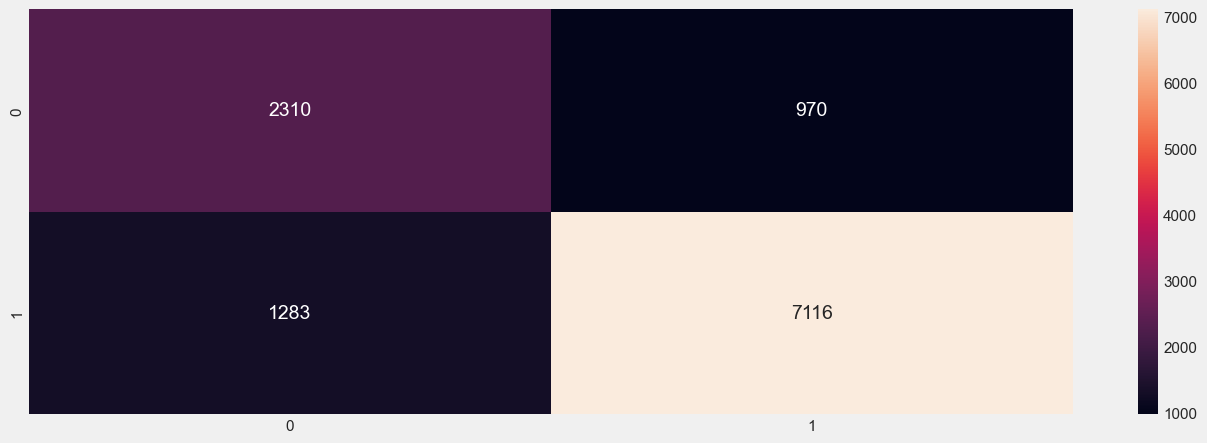

In [38]:
ensemble = VotingClassifier(estimators=[('Logistic Regression', LogisticRegression(random_state = random_state)),
                                              ('Naive Bayes', GaussianNB()),
                                              ('SVM', SVC(random_state=random_state, probability = True)),
                                              ('KNN', KNeighborsClassifier()),
                                              ('Decision Tree', DecisionTreeClassifier(random_state=random_state))], 
                                               voting='soft').fit(X_train,Y_train)

y_pred_ensemble = ensemble.predict(X_test)
print('\n Accuracy Score:\n', np.round(accuracy_score(Y_test, y_pred_ensemble), 3))
sns.heatmap(confusion_matrix(Y_test,y_pred_ensemble),annot=True,fmt='2.0f')
print('\n clasification report:\n', classification_report(Y_test,y_pred_ensemble))
print('\n Cohen Kappa Score:\n', metrics.cohen_kappa_score(Y_test, y_pred_ensemble))
plt.show()

## Stacking Classifier

In [39]:
Y_train = y_train
Y_test = y_test

models = [
    RandomForestClassifier(),
    SGDClassifier(),
    XGBClassifier()
    
]

# transform the dataset
from vecstack import stacking
Y_train = y_train
Y_test = y_test
S_train, S_test = stacking(models,                   
                           X_train, Y_train, X_test,   
                           regression=False, 
                           needs_proba=False,
                           save_dir=None, 
                           metric=f1_score, 
                           n_folds=3, 
                           stratified=True,
                           shuffle=True,  
                           random_state=123,    
                           verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [f1_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [RandomForestClassifier]
    fold  0:  [0.99880038]
    fold  1:  [0.99892047]
    fold  2:  [0.99868026]
    ----
    MEAN:     [0.99880037] + [0.00009807]
    FULL:     [0.99880038]

model  1:     [SGDClassifier]
    fold  0:  [0.99138756]
    fold  1:  [0.99508688]
    fold  2:  [0.99329823]
    ----
    MEAN:     [0.99325756] + [0.00151051]
    FULL:     [0.99325645]

model  2:     [XGBClassifier]
    fold  0:  [0.99844069]
    fold  1:  [0.99771772]
    fold  2:  [0.99880067]
    ----
    MEAN:     [0.99831969] + [0.00045032]
    FULL:     [0.99832000]



Final prediction score: [0.79510232]


<Axes: >


 clasification report:
               precision    recall  f1-score   support

           0       0.62      0.70      0.66      3280
           1       0.88      0.83      0.85      8399

    accuracy                           0.80     11679
   macro avg       0.75      0.77      0.76     11679
weighted avg       0.80      0.80      0.80     11679



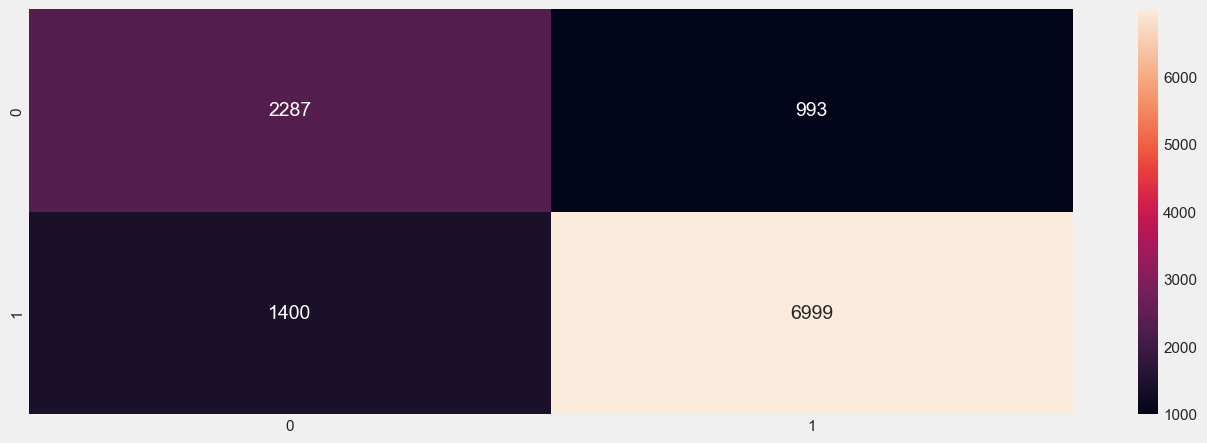

In [40]:
model = XGBClassifier()
model = model.fit(S_train, Y_train)
y_pred = model.predict(S_test)
print('Final prediction score: [%.8f]' % accuracy_score(Y_test, y_pred))
sns.heatmap(confusion_matrix(Y_test,y_pred),annot=True,fmt='2.0f')
print('\n clasification report:\n', classification_report(Y_test,y_pred))
plt.show()

<Axes: >

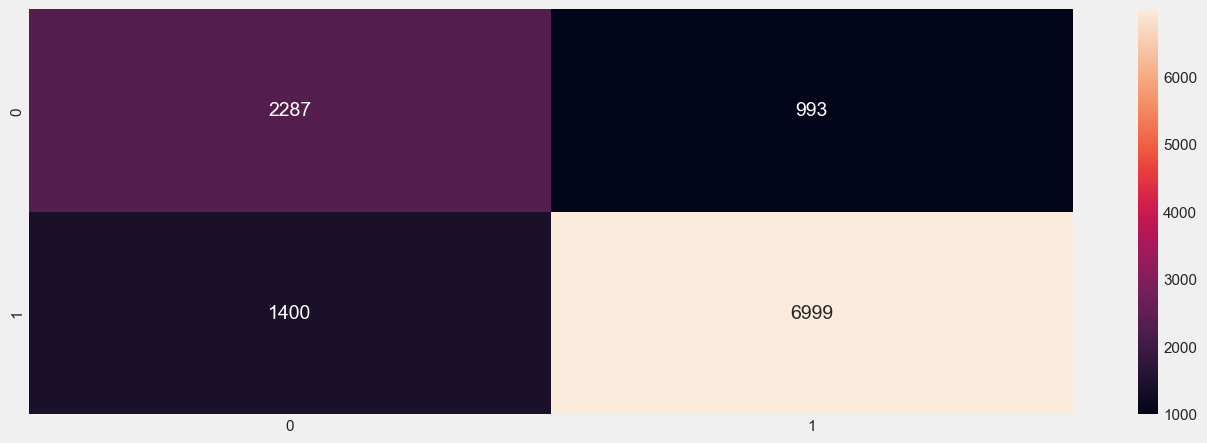

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef,Cohen Kappa
0,Stacked Classifier,0.795102,0.875751,0.833313,0.697256,0.854005,0.765285,7.385261,0.513013,0.511238


In [41]:
from sklearn import metrics
CM=confusion_matrix(Y_test,y_pred)
sns.heatmap(CM, annot=True, fmt='g')
plt.show();
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = metrics.log_loss(Y_test, y_pred)
acc= accuracy_score(Y_test, y_pred)
roc=metrics.roc_auc_score(Y_test, y_pred)
prec = metrics.precision_score(Y_test, y_pred)
rec = metrics.recall_score(Y_test, y_pred)
f1 = metrics.f1_score(Y_test, y_pred)
cohen_kappa = metrics.cohen_kappa_score(Y_test, y_pred)
mathew = metrics.matthews_corrcoef(Y_test, y_pred)

model_results =pd.DataFrame([['Stacked Classifier',acc, prec,rec,specificity, f1,roc, loss_log,mathew, cohen_kappa]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef', 'Cohen Kappa'])

model_results

## Comparison with other Models

In [42]:
models = [
    LogisticRegression(),
    GaussianNB(),
    DecisionTreeClassifier(),
    RandomForestClassifier(criterion='entropy',n_estimators=100),
    AdaBoostClassifier(),
    ExtraTreesClassifier(n_estimators= 100),
    SGDClassifier(max_iter=100, tol=1e-4),
    MLPClassifier()
]

SGD = SGDClassifier(max_iter=100, tol=0.0001, loss = 'log_loss')
SGD.fit(X_train, Y_train)

SGDClassifier(loss='log_loss', max_iter=100, tol=0.0001)

In [43]:
models = ["LogisticRegression", "Naive Bayes", "Decision Tree", 
          "Random Forest", "AdaBoost",  "Extra Trees", "Stochastic Gradient Classifier", "Multi-Layer Classifier"]

LR = LogisticRegression(C=100)
NB = GaussianNB()
DT = DecisionTreeClassifier()
RF = RandomForestClassifier(criterion='entropy')
ADA = AdaBoostClassifier(learning_rate=0.0001)
ET = ExtraTreesClassifier()
SGD = SGDClassifier(max_iter=100, tol=0.0001, loss = 'log_loss')
MLP = MLPClassifier()

LR.fit(X_train, Y_train)
NB.fit(X_train, Y_train)
DT.fit(X_train, Y_train)
RF.fit(X_train, Y_train)
ADA.fit(X_train, Y_train)
ET.fit(X_train, Y_train)
SGD.fit(X_train, Y_train)
MLP.fit(X_train, Y_train)

y_pred_LR = LR.predict(X_test) 
y_pred_NB = NB.predict(X_test) 
y_pred_DT = DT.predict(X_test)
y_pred_RF   = RF.predict(X_test)
y_pred_ADA  = ADA.predict(X_test)
y_pred_ET  = ET.predict(X_test)
y_pred_SGD  = SGD.predict(X_test)
y_pred_MLP  = MLP.predict(X_test)

LogisticRegression(C=100)

GaussianNB()

DecisionTreeClassifier()

RandomForestClassifier(criterion='entropy')

AdaBoostClassifier(learning_rate=0.0001)

ExtraTreesClassifier()

SGDClassifier(loss='log_loss', max_iter=100, tol=0.0001)

MLPClassifier()

In [44]:
data = {        'LR': y_pred_LR, 
                'NB': y_pred_NB,
                'DT': y_pred_DT,
                'RF': y_pred_RF, 
                'Adaboost': y_pred_ADA, 
                'ET': y_pred_ET,
                'SGD': y_pred_SGD, 
                'MLP': y_pred_MLP}

models = pd.DataFrame(data)

In [45]:
model_results_all = model_results
for column in models:
    CM=confusion_matrix(Y_test,models[column])
    
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    specificity = TN/(TN+FP)
    loss_log = metrics.log_loss(Y_test, models[column])
    acc= accuracy_score(Y_test, models[column])
    roc=metrics.roc_auc_score(Y_test, models[column])
    prec = metrics.precision_score(Y_test, models[column])
    rec = metrics.recall_score(Y_test, models[column])
    f1 = metrics.f1_score(Y_test, models[column])
    
    mathew = metrics.matthews_corrcoef(Y_test, models[column])
    cohen_kappa = metrics.cohen_kappa_score(Y_test, models[column])
    results =pd.DataFrame([[column,acc, prec,rec,specificity, f1,roc, loss_log,mathew, cohen_kappa]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef', 'Cohen Kappa'])
    model_results_all = pd.concat([model_results_all, results], ignore_index = True)

model_results_all

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef,Cohen Kappa
0,Stacked Classifier,0.795102,0.875751,0.833313,0.697256,0.854005,0.765285,7.385261,0.513013,0.511238
1,LR,0.807175,0.879398,0.848196,0.702134,0.863515,0.775165,6.950108,0.536518,0.535504
2,NB,0.807090,0.880040,0.847244,0.704268,0.863330,0.775756,6.953194,0.537044,0.535927
3,DT,0.804435,0.873184,0.851768,0.683232,0.862343,0.767500,7.048866,0.525435,0.524953
4,RF,0.804007,0.875769,0.847720,0.692073,0.861516,0.769897,7.064297,0.527448,0.526631
5,Adaboost,0.807090,0.880040,0.847244,0.704268,0.863330,0.775756,6.953194,0.537044,0.535927
6,ET,0.787910,0.874053,0.823789,0.696037,0.848177,0.759913,7.644501,0.499906,0.497500
7,SGD,0.807090,0.880040,0.847244,0.704268,0.863330,0.775756,6.953194,0.537044,0.535927
8,MLP,0.804007,0.876788,0.846410,0.695427,0.861332,0.770919,7.064297,0.528528,0.527573


In [46]:
model_resultsDF = model_results_all.copy()
model_resultsDF.to_csv('model_resultsDF_v2.csv', index = False)

# Hybrid Stacking

In [47]:
# Importing Necessary Libraries
from sklearn.ensemble import StackingClassifier
X_test, y_test = smt.fit_resample(X_test, y_test)
estimators = [('SGD Classifier', SGDClassifier()),
        ('Random Forest', RandomForestClassifier(n_estimators = 100, random_state = 0, max_depth = 7)),
        ('Multi Layer Perceptron', MLPClassifier(activation = "tanh", alpha = 0.05, random_state = 0))]
# Setting up the Meta-Classifier
clf = StackingClassifier(estimators = estimators, final_estimator = XGBClassifier(random_state = 0))
# fitting my model
clf.fit(X_train, y_train)

StackingClassifier(estimators=[('SGD Classifier', SGDClassifier()),
                               ('Random Forest',
                                RandomForestClassifier(max_depth=7,
                                                       random_state=0)),
                               ('Multi Layer Perceptron',
                                MLPClassifier(activation='tanh', alpha=0.05,
                                              random_state=0))],
                   final_estimator=XGBClassifier(base_score=None, booster=None,
                                                 callbacks=None,
                                                 colsample_bylevel=None,
                                                 colsample_bynode=None,
                                                 colsample_byt...
                                                 feature_types=None, gamma=None,
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=None, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=0, ...))

In [48]:
# predicting the test set results
y_pred = clf.predict(X_test)
# Checking Accuracy
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      1948
           1       0.98      0.97      0.98      5113

    accuracy                           0.96      7061
   macro avg       0.95      0.96      0.96      7061
weighted avg       0.97      0.96      0.96      7061



In [49]:
# # Defining Parameter Grid
# params = {
#     'final_estimator__n_estimators': [100],
#     'final_estimator__learning_rate': [0.0001, 0.001, 0.01, 0.1],
#     'final_estimator__booster':  ['gbtree', 'gblinear'],
#     'final_estimator__gamma': [0.01, 0.1],
#    'final_estimator__reg_alpha': [0, 1],
#     'final_estimator__reg_lambda':  [0.5, 1],
#     'final_estimator__base_score': [0.2, 0.5]
# }

# # Initialize GridSearchCV
# grid = GridSearchCV(estimator = clf, 
#                     param_grid = params, 
#                     cv = 5,
#                     scoring = "roc_auc",
#                     verbose = 2)
# # Fit GridSearchCV
# grid.fit(X_train, y_train)

In [50]:
# predicting the test set results
y_pred = clf.predict(X_test)
# Checking Accuracy
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      1948
           1       0.98      0.97      0.98      5113

    accuracy                           0.96      7061
   macro avg       0.95      0.96      0.96      7061
weighted avg       0.97      0.96      0.96      7061



In [51]:
print(accuracy_score(y_test, y_pred))

0.9644526271066421


In [52]:
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss

In [53]:
CM=confusion_matrix(Y_test,models[column])
    
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = metrics.log_loss(y_test, y_pred)
acc= accuracy_score(y_test, y_pred)
roc=metrics.roc_auc_score(y_test, y_pred)
prec = metrics.precision_score(y_test, y_pred)
rec = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
Hybrid_staking_clf_results =pd.DataFrame([['Hybrid Stacking Model',acc, prec,rec,specificity, f1,roc, loss_log,mathew, cohen_kappa]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef', 'Cohen Kappa'])
Hybrid_staking_clf_results

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef,Cohen Kappa
0,Hybrid Stacking Model,0.964453,0.981959,0.968707,0.695427,0.975288,0.960996,1.281257,0.528528,0.527573


In [54]:
model_results_all= pd.concat([Hybrid_staking_clf_results, model_results_all], ignore_index = True)
model_results_all

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef,Cohen Kappa
0,Hybrid Stacking Model,0.964453,0.981959,0.968707,0.695427,0.975288,0.960996,1.281257,0.528528,0.527573
1,Stacked Classifier,0.795102,0.875751,0.833313,0.697256,0.854005,0.765285,7.385261,0.513013,0.511238
2,LR,0.807175,0.879398,0.848196,0.702134,0.863515,0.775165,6.950108,0.536518,0.535504
3,NB,0.807090,0.880040,0.847244,0.704268,0.863330,0.775756,6.953194,0.537044,0.535927
4,DT,0.804435,0.873184,0.851768,0.683232,0.862343,0.767500,7.048866,0.525435,0.524953
5,RF,0.804007,0.875769,0.847720,0.692073,0.861516,0.769897,7.064297,0.527448,0.526631
6,Adaboost,0.807090,0.880040,0.847244,0.704268,0.863330,0.775756,6.953194,0.537044,0.535927
7,ET,0.787910,0.874053,0.823789,0.696037,0.848177,0.759913,7.644501,0.499906,0.497500
8,SGD,0.807090,0.880040,0.847244,0.704268,0.863330,0.775756,6.953194,0.537044,0.535927
9,MLP,0.804007,0.876788,0.846410,0.695427,0.861332,0.770919,7.064297,0.528528,0.527573



 Accuracy Score:
 0.964

 clasification report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.94      1948
           1       0.98      0.97      0.98      5113

    accuracy                           0.96      7061
   macro avg       0.95      0.96      0.96      7061
weighted avg       0.97      0.96      0.96      7061


 confussion matrix:
 [[1857   91]
 [ 160 4953]]


<Axes: >


 Cohen Kappa Score:
 0.9119944735077102




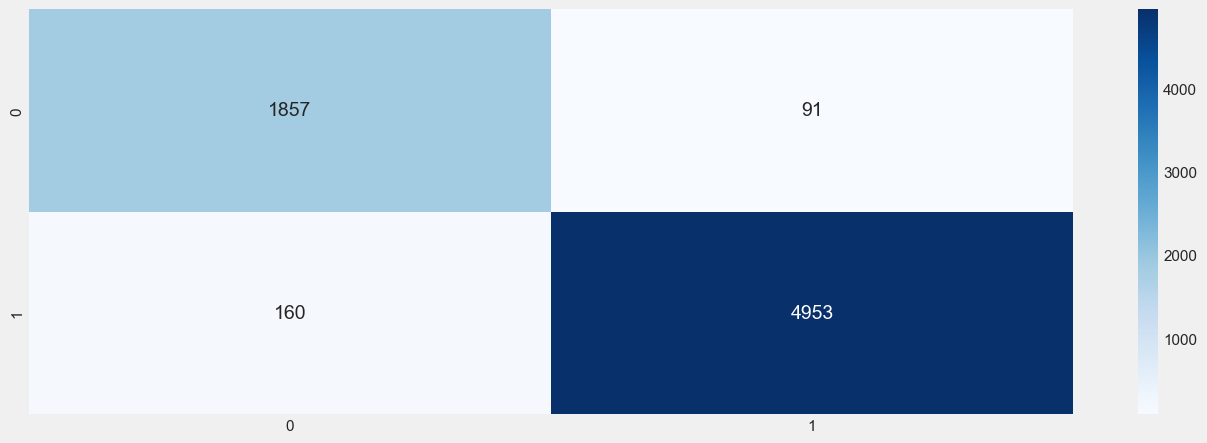

In [55]:
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print('\n Accuracy Score:\n', np.round(acc, 3))
print('\n clasification report:\n', classification_report(y_test, y_pred))
print('\n confussion matrix:\n', metrics.confusion_matrix(y_test, y_pred))
sns.heatmap(cm, annot = True,cmap='Blues', fmt='g')
print('\n Cohen Kappa Score:\n', metrics.cohen_kappa_score(y_test, y_pred))

print('\n')